# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df = pd.read_csv("world_happiness_report_2023.csv")

### Basic data inspection

In [3]:
df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   iso alpha                                   137 non-null    object 
 2   Regional indicator                          137 non-null    object 
 3   Happiness score                             137 non-null    float64
 4   Standard error of ladder score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   Logged GDP per capita                       137 non-null    float64
 8   Social support                              137 non-null    float64
 9   Healthy life expectancy                     136 non-null    float64
 10  Freedom to mak

### Data Cleaning

In [5]:
df = df.dropna()

### Statistical Summary

In [6]:
stats_summary = df.describe()
stats_summary

,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,0.064515,5.670772,5.418015,9.455191,0.798632,64.967632,0.788081,0.023566,0.724588,1.778000e+00,1.408919,1.155088,0.366176,0.540912,0.149088,0.146478,1.777838
std,1.142841,0.022996,1.120442,1.166522,1.210107,0.129597,5.750390,0.112498,0.141604,0.177353,2.897251e-15,0.433969,0.327263,0.156691,0.149671,0.075993,0.127009,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.702500,0.046750,4.939750,4.492250,8.587250,0.721000,60.648500,0.726250,-0.071000,0.666000,1.778000e+00,1.097750,0.959750,0.248500,0.458750,0.098500,0.059750,1.555250
50%,5.693500,0.060000,5.824000,5.550500,9.574500,0.826500,65.837500,0.801000,0.002000,0.772500,1.778000e+00,1.451500,1.225500,0.389500,0.557500,0.137500,0.112000,1.848500
75%,6.342500,0.076250,6.452000,6.244750,10.540250,0.896000,69.412500,0.874750,0.117500,0.846000,1.778000e+00,1.798000,1.401250,0.487500,0.656750,0.199250,0.188250,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


### Histogram Chart

In [7]:
def plot_histogram():
    """
    Creates a histogram to show the distribution of the happiness scores across regions.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Happiness score'], kde=True, bins=20)
    plt.title("Distribution of Happiness Scores")
    plt.xlabel("Happiness Score")
    plt.ylabel("Frequency")
    plt.show()

### Scatter Plot

In [8]:
def plot_scatter():
    """
    Creates a scatter plot to show the relationship between GDP per capita and happiness scores,
    with different colors representing each region.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Logged GDP per capita', 
                    y='Happiness score', 
                    hue='Regional indicator', 
                    palette='viridis',  # You can change the palette to any other seaborn color palette
                    data=df)
    plt.title("GDP per Capita vs. Happiness Score by Region")
    plt.xlabel("Logged GDP per capita")
    plt.ylabel("Happiness Score")
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves the legend outside the plot
    plt.show()

### Correlation Matrix Heatmap

In [9]:
def plot_heatmap():
    """
    Creates a heatmap to display correlations between numeric variables in the dataset.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()  # Calculate correlation matrix for numeric columns only
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Happiness Report Variables")
    plt.show()

### Descriptive Statistics for Relevant Variables

In [10]:
def generate_statistics():
    """
    Printing statistical measures for the Happiness Score, GDP per capita, and other relevant variables.
    """
    happiness_score = df['Happiness score']
    print("Mean Happiness Score:", happiness_score.mean())
    print("Median Happiness Score:", happiness_score.median())
    print("Standard Deviation of Happiness Score:", happiness_score.std())
    print("Skewness of Happiness Score:", happiness_score.skew())
    print("Kurtosis of Happiness Score:", happiness_score.kurt())

# Calling the functions to create plots and generate statistics

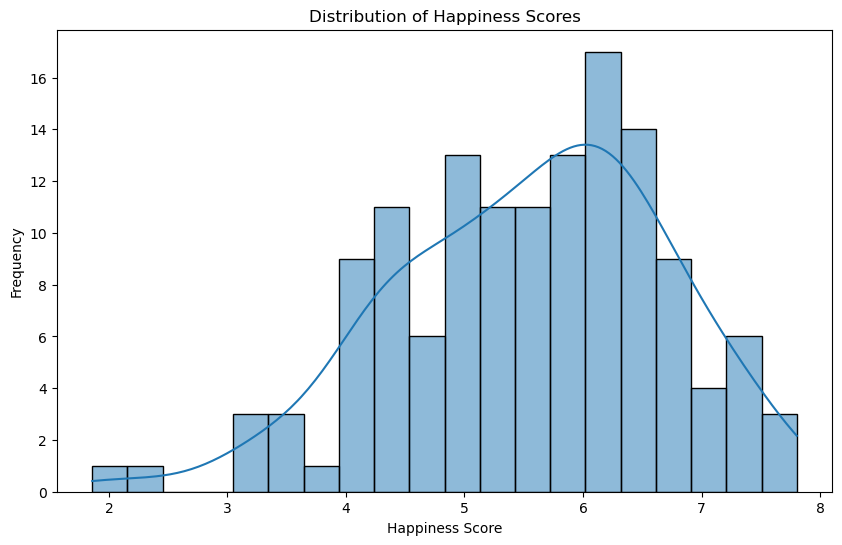

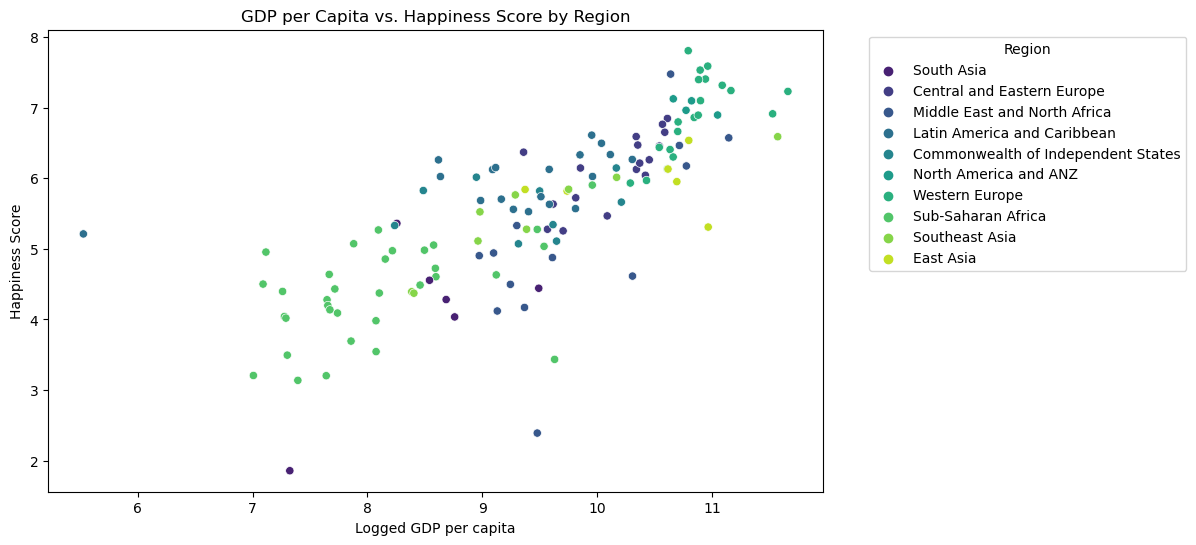

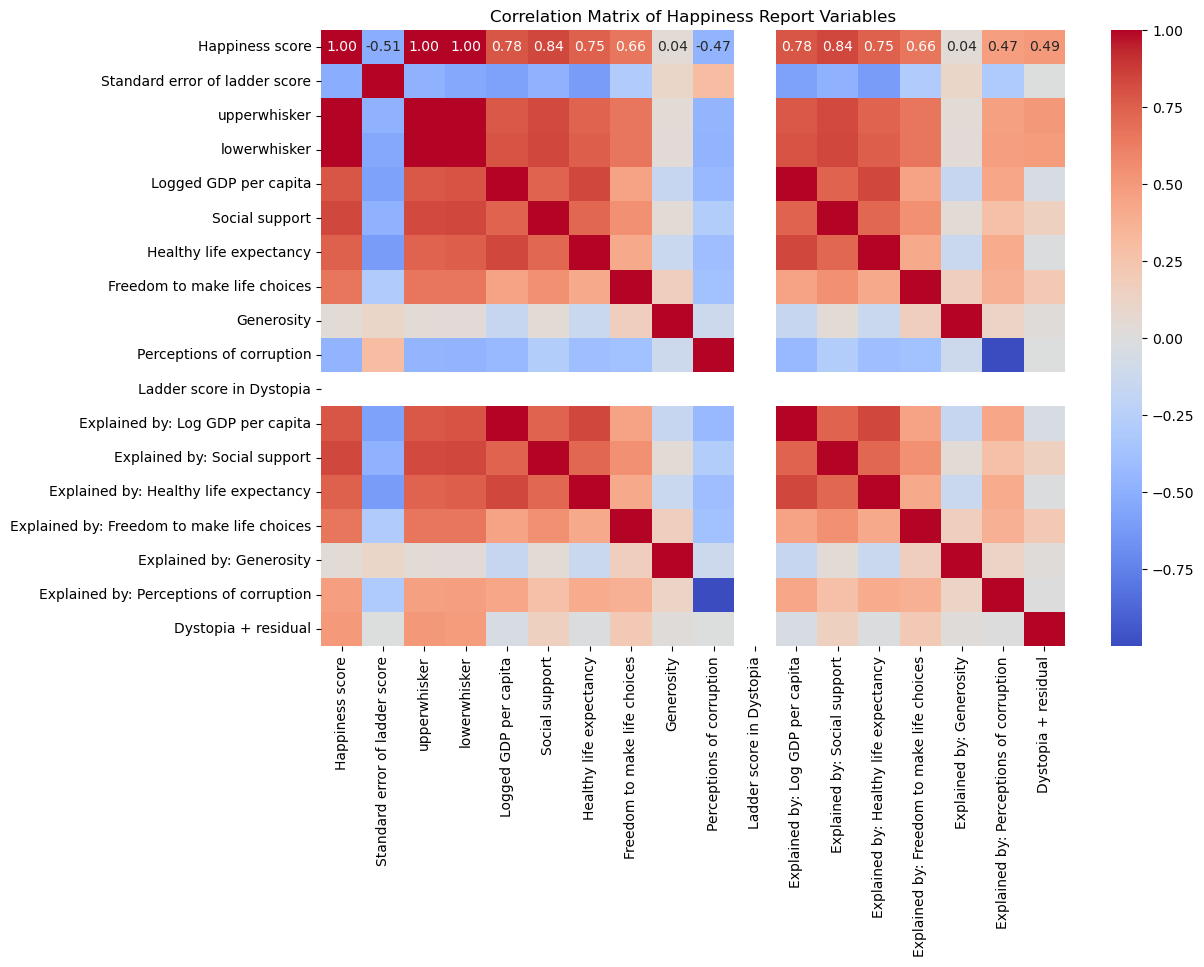

In [11]:
plot_histogram()    # Categorical Plot: Histogram for Happiness Score distribution
plot_scatter()      # Relational Plot: Scatter plot between GDP and Happiness Score
plot_heatmap()      # Statistical Plot: Heatmap for correlations

## Printing statistical measures for Happiness Score

In [12]:
generate_statistics()

Mean Happiness Score: 5.544441176470588
Median Happiness Score: 5.6935
Standard Deviation of Happiness Score: 1.1428405336717147
Skewness of Happiness Score: -0.46790689006983494
Kurtosis of Happiness Score: 0.062386737457842845
